# How to make an animation of an object from its stamps

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from alerce.core import Alerce
import imageio as iio
from pygifsicle import optimize
import os

In [2]:
alerce_client = Alerce()

### Input the object id

In [3]:
oid = 'ZTF21abcouxj'

### Download the light curve

In [4]:
curve = alerce_client.query_detections(oid, format='pandas')
curve

,mjd,candid,fid,pid,diffmaglim,isdiffpos,nid,distnr,magpsf,magpsf_corr,...,magapbig,sigmagapbig,rfid,has_stamp,corrected,dubious,candid_alert,step_id_corr,phase,parent_candid
0,59362.201724,1608201720515015022,1,1608201720515,20.472510,1,1608,4.640870,19.142166,None,...,19.1578,0.1536,717120105,True,False,False,None,correction_0.0.1,None,None
1,59362.245347,1608245340515015006,2,1608245340515,20.222622,1,1608,4.799460,19.229542,None,...,19.4883,0.2865,717120205,True,False,False,None,correction_0.0.1,None,None
2,59364.324664,1610324660515015009,2,1610324660515,20.309284,1,1610,4.825271,18.793653,None,...,19.0385,0.1743,717120205,True,False,False,None,correction_0.0.1,None,None
3,59366.215046,1612215040515015014,2,1612215040515,20.717949,1,1612,4.897573,18.454298,None,...,18.4401,0.0737,717120205,True,False,False,None,correction_0.0.1,None,None
4,59366.260949,1612260940515015009,1,1612260940515,20.751670,1,1612,4.667271,18.252869,None,...,18.2742,0.0562,717120105,True,False,False,None,correction_0.0.1,None,None
5,59368.197130,1614197120515015011,1,1614197120515,20.858180,1,1614,4.650076,18.080196,None,...,18.1005,0.0448,717120105,True,False,False,None,correction_0.0.1,None,None
6,59368.223843,1614223840515015008,2,1614223840515,20.724453,1,1614,4.893858,18.281120,None,...,18.2795,0.0638,717120205,True,False,False,None,correction_0.0.1,None,None
7,59370.226192,1616226190515015007,1,1616226190515,20.788668,1,1616,4.684872,17.963675,None,...,17.9399,0.0402,717120105,True,False,False,None,correction_0.0.1,None,None
8,59370.261308,1616261300515015016,2,1616261300515,20.665789,1,1616,4.928461,18.130676,None,...,18.0270,0.0524,717120205,True,False,False,None,correction_0.0.1,None,None
9,59372.197963,1618197960515015013,1,1618197960515,20.464853,1,1618,4.690574,17.893255,None,...,17.8570,0.0481,717120105,True,False,False,None,correction_0.0.1,None,None


### Let's use the g band only

In [5]:
g_band = curve[curve.fid == 1].copy()

### Download the image stamps

In [6]:
stamps = []
candid_g = g_band.candid.values
for i, candid in enumerate(candid_g):
    stamp = alerce_client.get_stamps(oid, candid=candid)
    stamps.append(stamp)
g_band['stamps'] = stamps
g_band

,mjd,candid,fid,pid,diffmaglim,isdiffpos,nid,distnr,magpsf,magpsf_corr,...,sigmagapbig,rfid,has_stamp,corrected,dubious,candid_alert,step_id_corr,phase,parent_candid,stamps
0,59362.201724,1608201720515015022,1,1608201720515,20.472510,1,1608,4.640870,19.142166,None,...,0.1536,717120105,True,False,False,None,correction_0.0.1,None,None,[<astropy.io.fits.hdu.image.PrimaryHDU object ...
4,59366.260949,1612260940515015009,1,1612260940515,20.751670,1,1612,4.667271,18.252869,None,...,0.0562,717120105,True,False,False,None,correction_0.0.1,None,None,[<astropy.io.fits.hdu.image.PrimaryHDU object ...
5,59368.197130,1614197120515015011,1,1614197120515,20.858180,1,1614,4.650076,18.080196,None,...,0.0448,717120105,True,False,False,None,correction_0.0.1,None,None,[<astropy.io.fits.hdu.image.PrimaryHDU object ...
7,59370.226192,1616226190515015007,1,1616226190515,20.788668,1,1616,4.684872,17.963675,None,...,0.0402,717120105,True,False,False,None,correction_0.0.1,None,None,[<astropy.io.fits.hdu.image.PrimaryHDU object ...
9,59372.197963,1618197960515015013,1,1618197960515,20.464853,1,1618,4.690574,17.893255,None,...,0.0481,717120105,True,False,False,None,correction_0.0.1,None,None,[<astropy.io.fits.hdu.image.PrimaryHDU object ...
11,59375.279271,1621279270515015004,1,1621279270515,20.353855,1,1621,4.722840,17.893421,None,...,0.0461,717120105,True,False,False,None,correction_0.0.1,None,None,[<astropy.io.fits.hdu.image.PrimaryHDU object ...
13,59377.301076,1623301070515015004,1,1623301070515,20.548473,1,1623,4.663636,17.973140,None,...,0.0516,717120105,True,False,False,None,correction_0.0.1,None,None,[<astropy.io.fits.hdu.image.PrimaryHDU object ...
14,59379.201482,1625201480515015013,1,1625201480515,20.766462,1,1625,4.659056,18.041113,None,...,0.0468,717120105,True,False,False,None,correction_0.0.1,None,None,[<astropy.io.fits.hdu.image.PrimaryHDU object ...
16,59381.301898,1627301890515015009,1,1627301890515,19.420963,1,1627,4.718821,18.210794,None,...,0.2059,717120105,True,False,False,None,correction_0.0.1,None,None,[<astropy.io.fits.hdu.image.PrimaryHDU object ...
18,59383.262917,1629262910515015003,1,1629262910515,19.592540,1,1629,4.657873,18.293175,None,...,0.1803,717120105,True,False,False,None,correction_0.0.1,None,None,[<astropy.io.fits.hdu.image.PrimaryHDU object ...


In [7]:
g_band.dropna(subset=['stamps'], inplace=True)
g_band['science_stamp'] = [stamp[0].data for stamp in g_band['stamps']]

### We will map the values measured in the camera to the 0 - 1 range
Taking all stamps into account, we will compute the percentile 1 and percentile 99.5 of the values of the pixels, ignoring the center of the stamp. Those values will be used to scale the brightness of each stamp.
An arcsinh operation is also performed.

In [8]:
science_ndarray = np.stack(g_band['science_stamp'].values, axis=-1)

In [9]:
center_mask = np.zeros((63, 63)).astype(bool)
center_pix = 63 / 2
radius_sq = 4
for i in range(63):
    for j in range(63):
        dist = (i - center_pix) ** 2 + (j - center_pix) ** 2
        if dist >= radius_sq:
            continue
        center_mask[i, j] = True

(-0.5, 62.5, 62.5, -0.5)

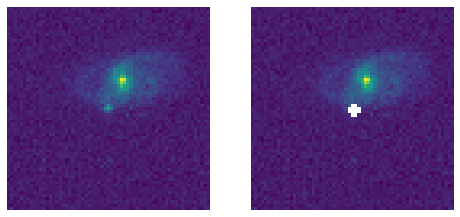

In [10]:
im = g_band['science_stamp'].iloc[0].copy()
plt.figure(figsize=(8, 5), facecolor='white')
plt.subplot(1, 2, 1)
plt.imshow(im)
plt.gca().axis('off')

plt.subplot(1, 2, 2)
im[center_mask] = np.nan
plt.imshow(im)
plt.gca().axis('off')

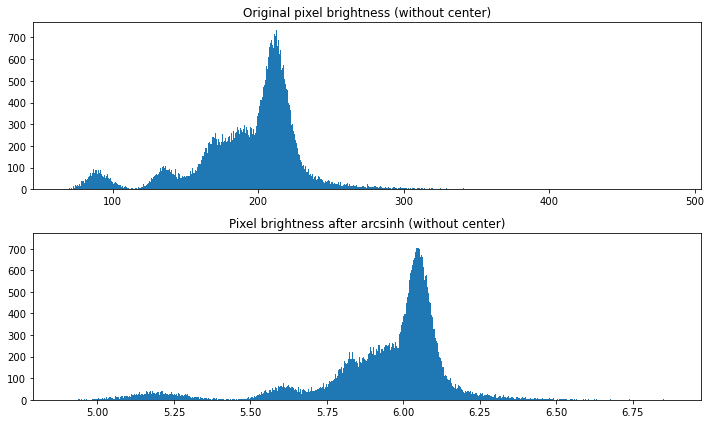

In [11]:
non_center_values = science_ndarray[~center_mask, :].flatten()

p1 = np.nanpercentile(non_center_values, 1)
p995 = np.nanpercentile(non_center_values, 99.5)

plt.figure(figsize=(10, 6), facecolor='white')
plt.subplot(2, 1, 1)
plt.hist(non_center_values, bins=1000)
plt.title('Original pixel brightness (without center)')
plt.subplot(2, 1, 2)
plt.hist(np.arcsinh(non_center_values), bins=1000)
plt.title('Pixel brightness after arcsinh (without center)')
plt.tight_layout();

In [12]:
def preprocess(im, low, high):
    asinh = np.arcsinh(im)
    low = np.arcsinh(low)
    high = np.arcsinh(high)
    asinh = (asinh - low) / (high - low) * 0.9
    final_imgs = np.clip(asinh, 0, 1)
    return final_imgs

/tmp/ipykernel_146364/2608645569.py:6: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(np.ceil(np.sqrt(n_stamps)), np.ceil(np.sqrt(n_stamps)), index+1)


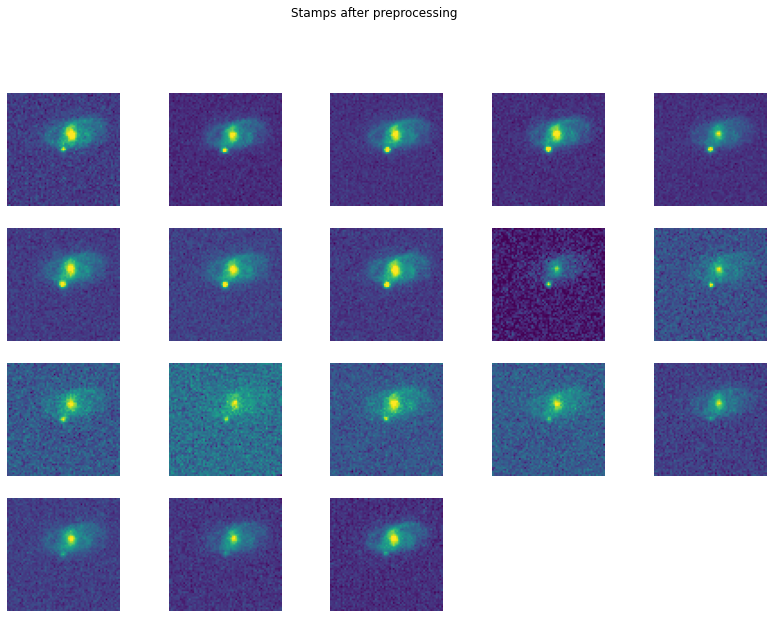

In [13]:
n_stamps = len(g_band)
plt.figure(figsize=(14, 12), facecolor='white')
plt.suptitle('Stamps after preprocessing')
for index in range(n_stamps):
    im = preprocess(g_band['science_stamp'].iloc[index], p1, p995)
    plt.subplot(np.ceil(np.sqrt(n_stamps)), np.ceil(np.sqrt(n_stamps)), index+1)
    plt.imshow(im)
    plt.gca().axis('off')

## Save stamps and create GIF

In [14]:
if not os.path.exists(oid):
    os.mkdir(oid)
    
gif_path = os.path.join(oid, "test.gif")
frames_path = os.path.join(oid, "{i}.jpg")

for i in range(n_stamps):
    plt.figure(figsize=(6, 6))
    det = g_band.iloc[i]
    im = preprocess(det['science_stamp'], p1, p995)
    plt.imshow(im)
    plt.gca().axis('off')
    plt.title(oid, fontsize=18)
    plt.tight_layout()
    plt.savefig(frames_path.format(i=i))
    plt.close()

with iio.get_writer(gif_path, mode='I', fps=5) as writer:
    for i in range(n_stamps):
        writer.append_data(iio.imread(frames_path.format(i=i)))
        
optimize(gif_path)

### Make MP4 video from GIF

In [ ]:
!ffmpeg -i ZTF21abcouxj/test.gif -movflags faststart -pix_fmt yuv420p -vf "scale=trunc(iw/2)*2:trunc(ih/2)*2" ZTF21abcouxj/test.mp4